In [173]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [138]:
conn = sqlite3.connect('FPA_FOD_20170508.sqlite')
fires = pd.read_sql_query('select * from Fires', conn)

## Sampling 10% of the dataset

In [139]:
fires_sample = fires.sample(frac=1/10)
fires_sample.sample(10)

,OBJECTID,FOD_ID,FPA_ID,SOURCE_SYSTEM_TYPE,SOURCE_SYSTEM,NWCG_REPORTING_AGENCY,NWCG_REPORTING_UNIT_ID,NWCG_REPORTING_UNIT_NAME,SOURCE_REPORTING_UNIT,SOURCE_REPORTING_UNIT_NAME,LOCAL_FIRE_REPORT_ID,LOCAL_INCIDENT_ID,FIRE_CODE,FIRE_NAME,ICS_209_INCIDENT_NUMBER,ICS_209_NAME,MTBS_ID,MTBS_FIRE_NAME,COMPLEX_NAME,FIRE_YEAR,DISCOVERY_DATE,DISCOVERY_DOY,DISCOVERY_TIME,STAT_CAUSE_CODE,STAT_CAUSE_DESCR,CONT_DATE,CONT_DOY,CONT_TIME,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,OWNER_CODE,OWNER_DESCR,STATE,COUNTY,FIPS_CODE,FIPS_NAME,Shape
162724,162725,164316,FS-392349,FED,FS-FIRESTAT,FS,USFLFNF,National Forests in Florida,0805,National Forests in Florida,64,None,AWR9,GRASSEY POND,None,None,None,None,None,2003,2452971.5,332,1511,9.0,Miscellaneous,2452971.5,332.0,1630,0.20,A,29.395278,-81.816667,5.0,USFS,FL,None,None,None,b'\x00\x01\xad\x10\x00\x00\x84\xd8GDDtT\xc0\x9...
1814583,1814584,300231703,SFO-2015MADCRMA070150057,NONFED,ST-NASF,ST/C&L,USMAMAS,Massachusetts Bureau of Forest Fire Control,MADCR,Massachusetts Department of Conservation and R...,None,MA070150057,None,None,None,None,None,None,None,2015,2457123.5,101,1435,3.0,Smoking,2457123.5,101.0,None,0.25,A,42.140741,-71.643760,12.0,MUNICIPAL/LOCAL,MA,Worcester,027,Worcester,b'\x00\x01\xad\x10\x00\x00D\x9e$]3\xe9Q\xc0p\x...
602179,602180,649977,SFO-TX01430603-10370737,NONFED,ST-NASF,ST/C&L,USTXTXS,Texas A & M Forest Service,TXCON,Texas Forest Service - Conroe Area,None,None,None,None,None,None,None,None,None,2003,2452857.5,218,None,5.0,Debris Burning,NaN,NaN,None,3.00,B,30.173060,-95.664440,14.0,MISSING/NOT SPECIFIED,TX,Montgomery,339,Montgomery,b'\x00\x01\xad\x10\x00\x00\xdc\x89Y/\x86\xeaW\...
1096977,1096978,1335842,CDF_1998_53_2211_511,NONFED,ST-CACDF,ST/C&L,USCALNU,Sonoma-Lake Napa Unit,CALNU,Sonoma-Lake Napa Unit,None,511,None,MONTEREY,None,None,None,None,None,1998,2451096.5,283,None,9.0,Miscellaneous,NaN,NaN,None,3.00,B,38.321944,-122.471944,14.0,MISSING/NOT SPECIFIED,CA,None,None,None,b'\x00\x01\xad\x10\x00\x00\x0c\xd5sV4\x9e^\xc0...
1196384,1196385,1450538,SFO-2010-NJDEPC051102,NONFED,ST-NASF,ST/C&L,USNJNJS,New Jersey Forest Fire Service,NJNJC,New Jersey Forest Fire Service Division C,None,C051102,None,None,None,None,None,None,None,2010,2455327.5,131,None,8.0,Children,NaN,NaN,None,0.25,A,39.330400,-75.095600,8.0,PRIVATE,NJ,Salem,033,Salem,b'\x00\x01\xad\x10\x00\x00\xd4_vO\x1e\xc6R\xc0...
977343,977344,1106005,TFS_FL_60413,NONFED,ST-FLFLS,ST/C&L,USFLFLS,Florida Forest Service,FLFLS2,FLS Chipola Forestry Center,None,0313,None,None,None,None,None,None,None,1997,2450713.5,265,None,2.0,Equipment Use,NaN,NaN,None,0.10,A,30.480000,-86.130000,14.0,MISSING/NOT SPECIFIED,FL,Walton,131,Walton,b'\x00\x01\xad\x10\x00\x00\xb4\x1e\x85\xebQ\x8...
823756,823757,944876,STATE_MS_85231,NONFED,ST-MSMSS,ST/C&L,USMSMSS,Mississippi Forestry Commission,MS Capital,MSS Capital District,None,00-025,None,None,None,None,None,None,None,2000,2451852.5,309,1345,7.0,Arson,NaN,NaN,None,2.00,B,31.814200,-89.958600,14.0,MISSING/NOT SPECIFIED,MS,None,None,None,b'\x00\x01\xad\x10\x00\x00\x84|\xd0\xb3Y}V\xc0...
482496,482497,519295,SFO-MD0405-3351,NONFED,ST-NASF,ST/C&L,USMDMDS,Maryland Department of Natural Resources Fores...,MD Eastern,MDS Eastern Maryland District,None,None,None,None,None,None,None,None,None,2008,2454713.5,248,None,2.0,Equipment Use,NaN,NaN,None,0.10,A,38.809420,-76.035220,14.0,MISSING/NOT SPECIFIED,MD,Talbot,041,Talbot,b'\x00\x01\xad\x10\x00\x00\x90\nc\x0bA\x02S\xc...
1820127,1820128,300238506,SFO-2015GAGAS-FY2015-Chattahoochee-004,NONFED,ST-NASF,ST/C&L,USGAGAS,Georgia Forestry Commission,GAGAS,Georgia Forestry Commission,None,FY2015-Chattahoochee-004,None,FY2015-CHATTAHOOCHEE-004,None,None,None,None,None,2015,2457069.5,47,0840,5.0,Debris Burning,2457069.5,47.0,0925,0.50,B,32.264406,-84.670439,8.0,PRIVATE,GA,Chattahoochee,053,Chattahoochee,b'\x00\x01\xad\x10\x00\x00\x0c\xa1\x84x\xe8*U\...
1532501,1532502,201387797,TFS-TXFD2009-191911,NONFED,ST-TXTXS,ST/C&L,USTXTXS,Texas A & M Forest Service,TXVFD,D

In [140]:
fires_sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 188046 entries, 248276 to 327995
Data columns (total 39 columns):
OBJECTID                      188046 non-null int64
FOD_ID                        188046 non-null int64
FPA_ID                        188046 non-null object
SOURCE_SYSTEM_TYPE            188046 non-null object
SOURCE_SYSTEM                 188046 non-null object
NWCG_REPORTING_AGENCY         188046 non-null object
NWCG_REPORTING_UNIT_ID        188046 non-null object
NWCG_REPORTING_UNIT_NAME      188046 non-null object
SOURCE_REPORTING_UNIT         188046 non-null object
SOURCE_REPORTING_UNIT_NAME    188046 non-null object
LOCAL_FIRE_REPORT_ID          42088 non-null object
LOCAL_INCIDENT_ID             105726 non-null object
FIRE_CODE                     32625 non-null object
FIRE_NAME                     92031 non-null object
ICS_209_INCIDENT_NUMBER       2480 non-null object
ICS_209_NAME                  2480 non-null object
MTBS_ID                       1079 non-null o

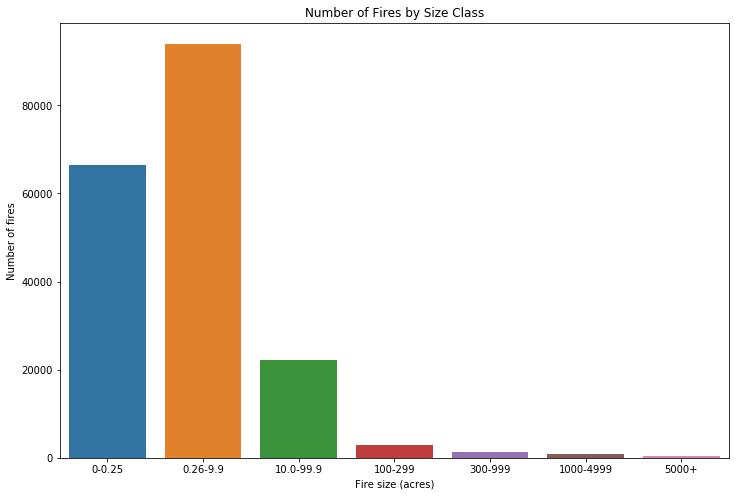

In [141]:
plt.figure(figsize=(12, 8))
fire_size_plot = sns.countplot(x='FIRE_SIZE_CLASS', data=fires_sample, order=['A','B','C','D','E','F','G'])
fire_size_plot.set_title('Number of Fires by Size Class')
fire_size_plot.set_xlabel('Fire size (acres)')
fire_size_plot.set_ylabel('Number of fires')
fire_size_plot.set_xticklabels(['0-0.25', '0.26-9.9', '10.0-99.9', '100-299', '300-999', '1000-4999', '5000+']);

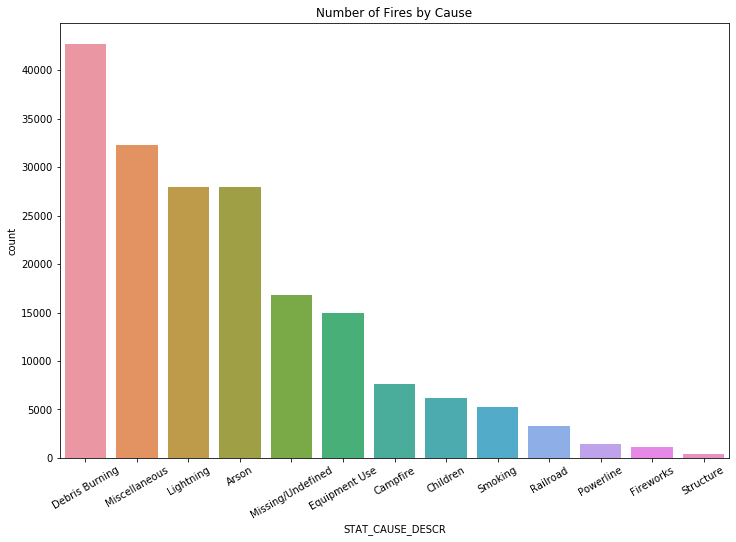

In [159]:
fig = plt.figure(figsize=(12,8))
fire_cause_plot = sns.countplot(x='STAT_CAUSE_DESCR', 
                                data=fires_sample, 
                                order=fires_sample.STAT_CAUSE_DESCR.value_counts().index)
fire_cause_plot.set_title('Number of Fires by Cause')
fire_cause_plot.set_xticklabels(fire_cause_plot.get_xticklabels(), rotation=30);

## Figure out relationship between fire cause and fire size

A=greater than 0 but less than or equal to 0.25 acres<br />
B=0.26-9.9 acres<br />
C=10.0-99.9 acres<br />
D=100-299 acres<br />
E=300 to 999 acres<br />
F=1000 to 4999 acres<br />
G=5000+ acres

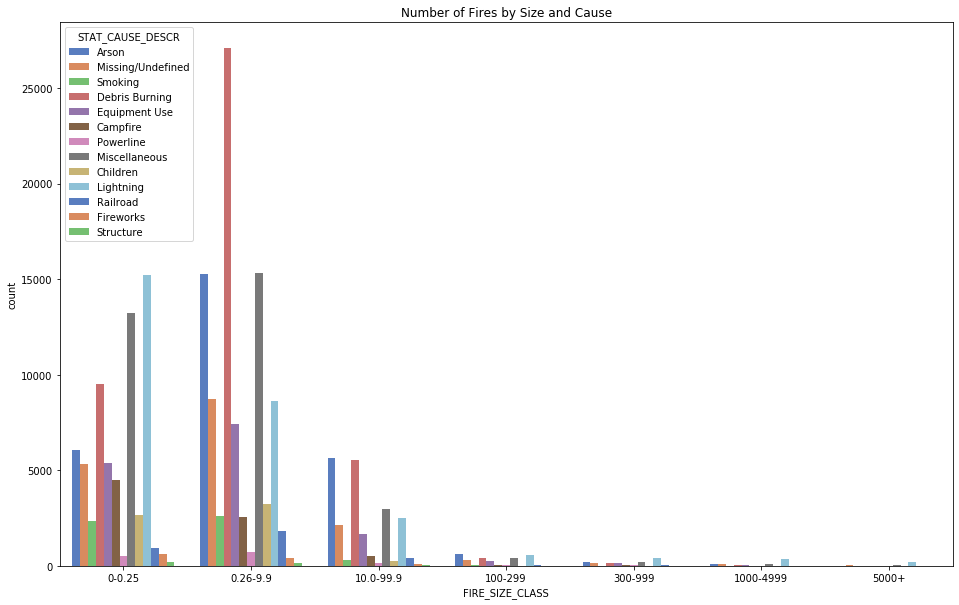

In [171]:
fig = plt.figure(figsize=(16,10))
size_cause_plot = sns.countplot(x='FIRE_SIZE_CLASS',
                                hue='STAT_CAUSE_DESCR',
                                data=fires_sample,
                                order=['A','B','C','D','E','F','G'],
                                palette='muted')
size_cause_plot.set_title('Number of Fires by Size and Cause')
size_cause_plot.set_xticklabels(['0-0.25', '0.26-9.9', '10.0-99.9', '100-299', '300-999', '1000-4999', '5000+']);

In [150]:
fires[['STATE', 'FIRE_SIZE', 'STAT_CAUSE_DESCR']].sort_values(by='FIRE_SIZE', ascending=False).head(20)

,STATE,FIRE_SIZE,STAT_CAUSE_DESCR
211296,AK,606945.0,Lightning
1579574,OR,558198.3,Lightning
1459664,AZ,538049.0,Campfire
305585,AK,537627.0,Lightning
1215267,AK,517078.0,Lightning
153705,OR,499945.0,Lightning
305684,AK,483280.0,Lightning
352785,TX,479549.0,Missing/Undefined
305642,AK,463994.0,Lightning
1578265,OR,461047.0,Lightning


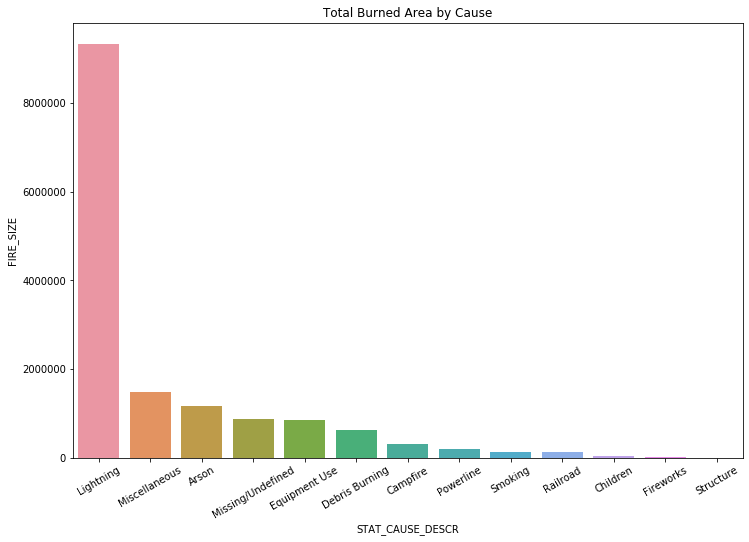

In [170]:
fire_size_by_cause = fires_sample.groupby(['STAT_CAUSE_DESCR'])['FIRE_SIZE'].sum().reset_index()

plt.figure(figsize=(12,8))
fire_size_by_cause_plot = sns.barplot(x='STAT_CAUSE_DESCR', 
                                      y='FIRE_SIZE', 
                                      data=fire_size_by_cause, 
                                      order=fire_size_by_cause.sort_values(by='FIRE_SIZE', ascending=False).STAT_CAUSE_DESCR.tolist())
fire_size_by_cause_plot.set_title('Total Burned Area by Cause')
fire_size_by_cause_plot.set_xticklabels(fire_size_by_cause_plot.get_xticklabels(), rotation=30);

## Explore Other Features

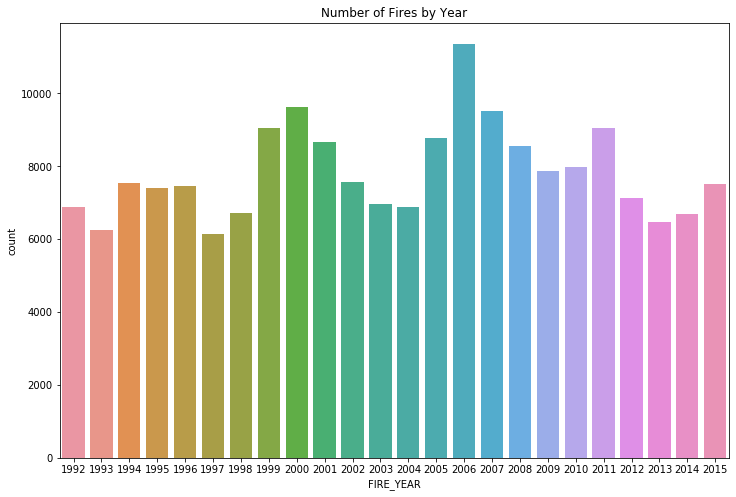

In [168]:
plt.figure(figsize=(12,8))
fire_by_year_plot = sns.countplot(x='FIRE_YEAR', data=fires_sample)
fire_by_year_plot.set_title('Number of Fires by Year');

Text(0.5, 1.0, 'Fires by Cause Over Day of Year')

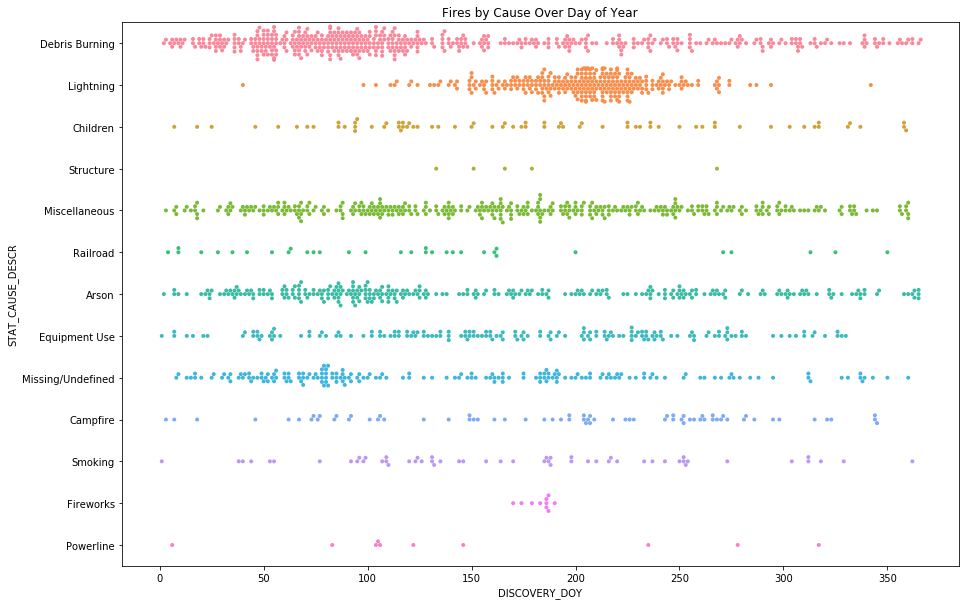

In [197]:
plt.figure(figsize=(15,10))
doy_cause_plot = sns.swarmplot(x='DISCOVERY_DOY', y='STAT_CAUSE_DESCR', data=fires.sample(2000), size=4)
doy_cause_plot.set_title('Fires by Cause Over Day of Year')

## Select features

In [153]:
features = ['FIRE_YEAR', 'FIRE_SIZE', 'DISCOVERY_DOY', 'LATITUDE', 'LONGITUDE']
X = fires_sample[features]
y = fires_sample['STAT_CAUSE_DESCR']

train_X, val_X, train_y, val_y = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=1)

## Decision Tree

In [154]:
dt_model = DecisionTreeClassifier(random_state=1)
dt_model.fit(train_X, train_y)
dt_prediction = dt_model.predict(val_X)

print('Accuracy:', metrics.accuracy_score(val_y, dt_prediction))

Accuracy: 0.43185323052379687
